# Modelos de Clasificación

------------------------------------------------------


### Data Science and Machine Learning

#### Febrero 2023

**Aurora Cobo Aguilera**

**The Valley**

------------------------------------------------------

Los modelos de clasificación también se engloban dentro del aprendizaje supervisado. En este caso el *target* es una **clase** de entre un conjunto de clases predefinidas a priori. En el caso de que las clases sean solo 2, hablamos de **clasificación binaria** y estas clases se suelen denominar **positiva** ($y=+1$) y **negativa** ($y=-1$), o 1 y 0. En caso de que haya más de dos clases hablamos de escenarios **multiclase**.

Probablemente los problemas de clasificación automática son los más estudiados dentro del mundo del aprendizaje automático. Alguno de los algoritmos más referenciados son:

- k Vecinos más próximos (kNN)
- Árboles de decisión
- Random Forests
- Regresión logística
- Clasificador lineal de Fisher
- Máquina de Vectores Soporte (SVM)


En un problema de clasificación genérico, nos dan un vector de observaciones 
 ${\bf x}\in \mathbb{R}^D$ que pertenece a una y sólo una *categoría* o *clase*, $y$, en el conjunto $Y = \{0, 1, \ldots, C-1\}$. El objetivo de un clasificador es predecir el valor de $y$ basado en ${\bf x}$.

Para diseñar el clasificador, nos dan una colección de observaciones etiquetadas $D = \{({\bf x}^{(n)}, y^{(n)})\}_{n=1}^N$ donde, para cada observación ${\bf x}^{(n)}$, el valor de su categoría real, $y^{(n)}$, es conocido.

------

En este notebook estudiaremos el clasificador llamado regresión logística, por su parecido a una regresión lineal, con la particular diferencia de aplicar una función que nos devuelva probabilidades para cada clase del problema a resolver. Para ello, antes estudiaremos y veremos un poco la base teórica en la que se fundamenta dicho modelo y aplicaremos los conceptos de probabilidad vistos en teoría. No hace falta que entendáis a la perfeción todas las ecuaciones y la teoría, pero así podéis ver la relación de la teoría de la probabilidad en la creación de modelos de aprendizaje automático.

Además, veremos cómo podemos incluir no linealidades a este modelo, estudiaremos técnicas de regularización para no sobreajustar y por último, definiremos y utilizaremos en un ejemplo práctico, diferentes medidas de evaluar un problema de clasificación.

### 0.1. Clasificación binaria

Primero nos centraremos en un problema de clasificación binaria, donde el conjunto de etiquetas es binario $Y = \{0, 1\}$ y las observaciones $X\in \mathbb{R}^D$. A pesar de su simplicidad, es el caso más frecuente. Muchos problemas de clasificación multi-clase se resuelven descomponiéndolos en colecciones de problemas binarios.

### 0.2. La suposición i.i.d.

En algoritmos de clasificación, como en muchos otros en ML, se basan en dos hipótesis principales:

   - Todas las muestras en el dataset $D$ son i.i.d. (independientes e indénticamente distribuidas), i.e., todas la muestras son salidas independientes de una distribución desconocida $p({\bf x}, y)$.
   - Para cualquier dato de test, la tupla formada por la muestra de entrada y su clase desconocida, $({\bf x}, y)$, es una salida independiente de la *misma* distribución.
   
Estas dos suposiciones son esenciales para tener garantías de que el clasificador diseñado basado en $D$ tenga buenos resultados en nuestras muestras de test. Ten en cuenta que a pesar de asumir la presencia de una distribución subyacente, ésta es desconocida: en otro caso, podríamos ignorar $D$ y aplicar teoría de la decisión clásica para encontrar el predictor óptimo basado en $p({\bf x}, y)$.

### 0.3. Clasificación binaria y teoría de la decisión. El criterio MAP 

El objetivo de un problema de clasificación binaria es asignar una *clase* o *categoría* a cada *entrada* u *observación* de una colección de datos. Aquí asumiremos que cada entrada ${\bf x}$ es un vector $D$-dimensional en $\mathbb{R}^D$, y que la clase $y$ de la muestra ${\bf x}$ es un elemento de un conjunto binario $Y = \{0, 1\}$. El objetivo del clasificador es predecir el valor verdadero de $y$ después de observar ${\bf x}$.

Definiremos como $\hat{y}$ la salida del clasificador o *decisión*. Si $y=\hat{y}$, la decisión es un *acierto*, en otro caso $y\neq \hat{y}$ y la decisión es un *error*.

La **Teoría de la Decisión** proporciona una solución al problema de clasificación en situaciones donde la relación entre las entradas ${\bf x}$ y su clase $y$ es dada por un modelo probabilístico conocido: Asume que cada tupla $({\bf x}, y)$ es una salida de un vector aleatorio $({\bf X}, Y)$ con distribución conjunta $p_{{\bf X},Y}({\bf x}, y)$. Un criterio natural para clasificación es seleccionar el predictor $\hat{Y}=f({\bf x})$ de manera que la probabilidad de error, $P\{\hat{Y} \neq Y\}$ sea mínima. Teniendo en cuenta que

$$
P\{\hat{Y} \neq Y\} = \int P\{\hat{Y} \neq Y | {\bf x}\} p_{\bf X}({\bf x}) d{\bf x}
$$

la decisión óptima se obtiene si, para cada muestra ${\bf x}$, tomamos una decisión minimizando la probabilidad de error condicional:

\begin{align}
\hat{y}^* &= \arg\min_{\hat{y}} P\{\hat{y} \neq Y |{\bf x}\} \\
          &= \arg\max_{\hat{y}} P\{\hat{y} = Y |{\bf x}\} \\
\end{align}


Entonces, la regla de la decisión óptima se puede expresar como

$$
P_{Y|{\bf X}}(1|{\bf x}) \quad\mathop{\gtrless}^{\hat{y}=1}_{\hat{y}=0}\quad  P_{Y|{\bf X}}(0|{\bf x}) 
$$

o, equivalentemente

$$
P_{Y|{\bf X}}(1|{\bf x}) \quad\mathop{\gtrless}^{\hat{y}=1}_{\hat{y}=0}\quad  \frac{1}{2} 
$$

El clasificador que implementa esta regla de decisión usualmente se llama MAP (*Maximum A Posteriori*). 

### 0.4. Clasificación paramétrica.

La Teoría de la Decisión clásica se basa en la suposición de que el modelo probabilístico relacionando la muestra observada ${\bf X}$ y la hipótesis real $Y$ es conocida. Desafortunadamente, esto no es realista en muchas aplicaciones, donde la única información disponible para construir el clasificador es un dataset $D = \{({\bf x}^{(n)}, y^{(n)}), \,n=1,\ldots,N\}$ de entradas y sus respectivas etiquetas de clase.

Una formulación más realista del problema de clasificación es la siguiente: dado un dataset $D = \{({\bf x}^{(n)}, y^{(n)}) \in {\mathbb{R}}^D \times Y, \, n=1,\ldots,N\}$ de muestras i.i.d. de una distribución ***desconocida*** $p_{{\bf X},Y}({\bf x}, y)$, predice la clase $y$ de una nueva muestra ${\bf x}$ con la mínima probabilidad de error.

Ya que el modelo de probabilidad de generar los datos es desconocido, la regla de decisión MAP no se puede aplicar. Sin embargo, muchos algoritmos de clasificación usan el dataset para obtener estimaciones de las probabilidades de clase a posteriori, y lo aplican para implementar una aproximación del decisor MAP.

Los clasificadores paramétricos que se basan en esta idea asumen, adicionalmente, que la probabilidad de clase a posteriori satisface alguna fórmula paramétrica:

$$
P_{Y|X}(1|{\bf x},{\bf w}) = f_{\bf w}({\bf x})
$$

donde ${\bf w}$ es el vector de parámetros. Dada la expresión del decisor MAP, la clasificación consiste en comparar el valor de $f_{\bf w}({\bf x})$ con el umbral $\frac{1}{2}$, y cada vector de parámetros se asociará a un decisor diferente.

En práctica, el dataset $D$ se usa para seleccionar un vector de parámetros particular $\hat{\bf w}$ de acuerdo a cierto criterio. Así la regla de decisión será 

$$
f_{\hat{\bf w}}({\bf x}) \quad\mathop{\gtrless}^{\hat{y}=1}_{\hat{y}=0}\quad  \frac{1}{2} 
$$

En este notebook, exploraremos uno de los modelos más populares basados en clasificación paramétrica: **logistic regression**.


## 1. Regresión Logística
---


La **regresión logística** resuelve un problema de clasificación **binario** aprendiendo un regresor lineal que trata de ajustar la **probabilidad** de que cada una de las observaciones pertenezca a la **clase positiva**. Como ya hemos mencionado, se trata de un modelo paramétrico.

### ¿Regresión lineal para clasificar?

En regresión lineal, en la que el target $y$ es un valor real ($y\in\mathbb{R}$), utilizamos un modelo del tipo

$$y \approx \mathbf{w}^T \mathbf{x}$$

- Sin embargo, en **clasificación binaria**, el target solo tiene dos posibles valores (que típicamente codificamos como $y\in\{0,1\}$). 
- En este sentido el modelo de regresión lineal **no puede usarse como tal**. No se adapta de forma sencilla a estos dos únicos valores del target $y$.



En regresión logística aproximamos la probabilidad de la etiqueta $y$ usando una **combinación lineal** de las entradas $\bf x$:

$$P(y=1| {\bf x}) =  \frac{1}{1+e^{-({\bf w}^T {\bf x}+w_0)}}=\sigma({\bf w}^T {\bf x}+w_0)$$
$$$$
$$ P(y=0| {\bf x}) = 1- P(Y=y| {\bf x}) = 1 - \sigma({\bf w}^T {\bf x}+w_0)$$

donde 

- $w_0$ y ${\bf w} = [w_1, \ldots, w_D]$ son parámetros o coeficientes que aprenderemos usando el conjunto de datos de entrenamiento $(\mathbf{x}^{(i)},y^{(i)})_{i=1,\ldots,N}$.
$$$$
- $\sigma(a) = \frac{1}{1+\exp(-a)}$ es la función sigmoide o logística.
$$$$
- Fijaos que la probabilidad $P(y=1| {\bf x})$ es la misma todos los puntos $\mathbf{x}$ tales que ${\bf w}^T {\bf x}$ es constante. 
$$$$
- Además, para todo $a\in\mathbb{R}$, ${\bf w}^T {\bf x} + w_0= a$ es la ecuación de un **plano** en un espacio de dimensión D (el número de componentes de $\mathbf{x}$). Por ejemplo, una recta en el caso $D=2$.

Hablemos primero de $\sigma(x)$.

### 1.1. La función sigmoide o logística
---

La función *sigmoide* se define por

$$\sigma(t) = \frac{1}{1+e^{-t}}$$

La función sigmoide tiene las siguientes propiedades:

- **P1**: Salida probabilística: $\quad 0 \le \sigma(t) \le 1$
- **P2**: Simetría: $\quad \sigma(-t) = 1-\sigma(t)$
- **P3**: Monótona: $\quad \sigma'(t) = \sigma(t)·[1-\sigma(t)] \ge 0$

A continuación, definimos la función sigmoide en python, y la representamos gráficamente.




In [1]:
# To visualize plots in the notebook
%matplotlib inline

# Imported libraries
import csv
import random
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
import pandas as pd
from matplotlib import cm
import pylab

import seaborn as sns; sns.set()
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from scipy.stats import multivariate_normal, norm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

> **Ejercicio:** completa el código para calcular la función logística según la definción dada anteriormente.

<ipython-input-2-3c2fb1681daa>:18: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
<ipython-input-2-3c2fb1681daa>:21: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='minor', color='gray', alpha=0.2, ls='dotted', lw=1)


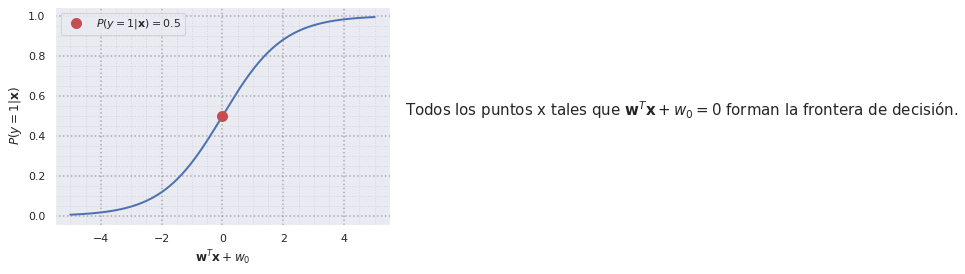

In [2]:
def logistic(x):                                        
   p = 1.0 / (1 + np.exp(-x))
   return p

x = np.arange(-5,5,1e-3)

y = logistic(x)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(x,y,'-b',lw=2)
ax.plot(0,0.5,'or',ms=10,label=r'$P(y=1|\mathbf{x})=0.5$')
plt.xlabel('$\mathbf{w}^T\mathbf{x}+w_0$')
plt.ylabel('$P(y=1|\mathbf{x})$')
plt.legend()
# Lineas principales de la rejilla
plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
# Lineas menores de la rejilla
plt.minorticks_on()
plt.grid(b=True, which='minor', color='gray', alpha=0.2, ls='dotted', lw=1)

ax.text(6, 0.5, r'Todos los puntos x tales que $\mathbf{w}^T\mathbf{x}+w_0=0$ forman la frontera de decisión.', fontsize=15)

plt.show()

### 1.2. Clasificador lineal basado en la función logística.
---

El clasificador MAP bajo la función logística tiene la forma

$$P_{Y|{\bf X}}(1|{\bf x}, {\bf w}) = \sigma({\bf w}^\intercal{\bf x}) \quad\mathop{\gtrless}^{\hat{y}=1}_{\hat{y}=0} \quad \frac{1}{2} $$

Por tanto

$$
2 \quad\mathop{\gtrless}^{\hat{y}=1}_{\hat{y}=0} \quad  
1 + e^{(-{\bf w}^\intercal{\bf x})} $$

que es equivalente a

$${\bf w}^\intercal{\bf x} 
\quad\mathop{\gtrless}^{\hat{y}=1}_{\hat{y}=0}\quad 
0 $$

Es decir, los clasificadores basados en la función logística tienen fronteras de decisión lineales pasando por el origen,  ${\bf x} = {\bf 0}$. 

<ipython-input-5-1be35bd8b123>:17: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


Text(0.5, 0, 'P(1|x,w)')

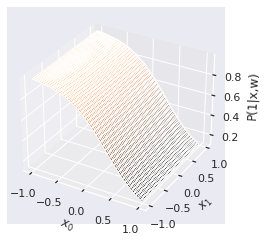

In [5]:
# Vector de pesos
w = [1, -3, 0]   # Prueba diferentes pesos

# Crea una rejilla rectangular
x_min = -1
x_max = 1
dx = x_max - x_min
h = float(dx) / 200
xgrid = np.arange(x_min, x_max, h)
xx0, xx1 = np.meshgrid(xgrid, xgrid)

# Calcula el mapa de la función logística para los pesos dados
Z = logistic(w[0] + w[1]*xx0 + w[2]*xx1)

# Dibuja el mapa de la función logística
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(xx0, xx1, Z, cmap=plt.cm.copper)
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
ax.set_zlabel('P(1|x,w)')

### 1.3. Clasificadores no lineales.
---

Al igual que en el modelo de regresión lineal podíamos incluir no linealidades con transformaciones de las variables de entrada, en la regresión logística podemos proceder de forma análoga.

El modleo logístico se puede extender para construir un clasificador no lineal usando transformaciones no lineales de los datos. Una forma de definir el modelo de regresión logística no lineal es:

$$P_{Y|{\bf X}}(1|{\bf x}, {\bf w}) = \sigma([{\bf w}^\intercal{\bf z}({\bf x})]) $$

donde ${\bf z}({\bf x})$ es una transformación no lineal arbitraria de las variables originales. La frontera de decisión en este caso es dada por:

$$
{\bf w}^\intercal{\bf z} = 0
$$

> **Ejercicio**: Modifica el código de arriba para generar una superficie 3D del modelo de regresión logística polinómico dado por: 

$$
P_{Y|{\bf X}}(1|{\bf x}, {\bf w}) = \sigma((1 + 10 x_0 + 10 x_1 - 20 x_0^2 + 5 x_0 x_1 -20 x_1^2) 
$$

<ipython-input-6-af6dd1e79744>:18: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


Text(0.5, 0, 'P(1|x,w)')

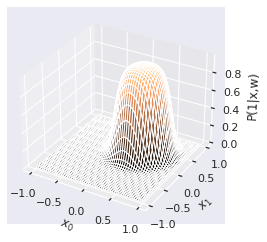

In [6]:
#<SOL>
# Vector de pesos
w = [1, 10, 10, -20, 5, -20]   # Prueba diferentes pesos

# Crea una rejilla rectangular
x_min = -1
x_max = 1
dx = x_max - x_min
h = float(dx) / 200
xgrid = np.arange(x_min, x_max, h)
xx0, xx1 = np.meshgrid(xgrid, xgrid)

# Calcula el mapa de la función logística para los pesos dados
Z = logistic(w[0] + w[1]*xx0 + w[2]*xx1 + w[3]*xx0**2 + w[4]*xx0*xx1 + w[5]*xx1**2)

# Dibuja el mapa de la función logística
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(xx0, xx1, Z, cmap=plt.cm.copper)
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
ax.set_zlabel('P(1|x,w)')
#</SOL>

### 1.4 Entendamos la frontera de decisión
---

En un dataset de dos dimensiones y volviendo al caso lineal, vamos a ver ahora qué ocurre a medida que variamos $\mathbf{w}$ y $w_0$.


In [7]:
data_ejemplo1 = pd.read_csv('http://www.tsc.uc3m.es/~olmos/BBVA/ejemplo1.txt', header=None)

data_ejemplo1.head(10)


,0,1,2
0,34.623660,78.024693,1
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
5,45.083277,56.316372,0
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1
9,84.432820,43.533393,1


In [8]:
data = np.array(data_ejemplo1)

## Dimensiones
dims = np.shape(data)
N = dims[0]

## Separamos X e Y
X01 = data[:, 0:2]
Y1 = data[:, 2]

# Separamos train de test
X01_train, X01_test, Y1_train, Y1_test = train_test_split(X01, Y1, test_size=0.2, random_state=0)

print("El conjunto de datos de entrenamiento consta {0:d} observaciones de {1:d} dimensiones\n".format(X01_train.shape[0], X01_train.shape[1]))

# Variables para la representación de la frontera de decisión (antes de normalizar!)
min1 = np.min(X01_train[:,0])-1
max1 = np.max(X01_train[:,0])+1
min2 = np.min(X01_train[:,1])-1
max2 = np.max(X01_train[:,1])+1

# Normalizamos los datos (media 0, varianza 1)
transformer1 = StandardScaler().fit(X01_train)   # X0 -->sin normalizar, X --> normalizadas

X1_train = transformer1.transform(X01_train)
X1_test = transformer1.transform(X01_test)

El conjunto de datos de entrenamiento consta 80 observaciones de 2 dimensiones



<ipython-input-9-50e53ad3a21b>:13: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)


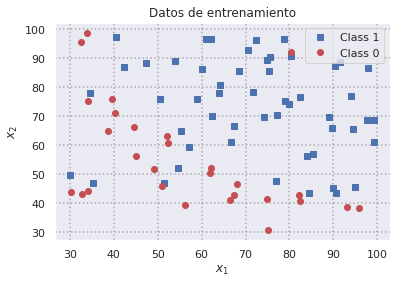

<ipython-input-9-50e53ad3a21b>:30: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)


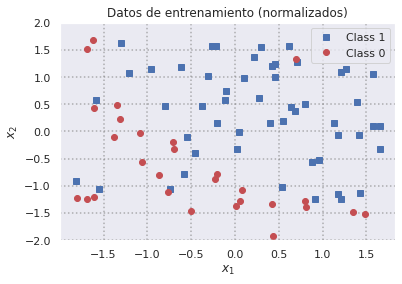

In [9]:
## Dibujamos los datos de entrenamiento
index = (Y1_train==1)
plt.figure()
plt.plot(X01_train[index,0],X01_train[index,1],'s',label="Class 1")
index=(Y1_train==0)
plt.plot(X01_train[index,0],X01_train[index,1],'ro',label="Class 0")
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.grid(True)
plt.legend(loc='upper right')
plt.title('Datos de entrenamiento')
# Principales líneas de la rejilla
plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
plt.show()


## Dibujamos los datos de entrenamiento
index = (Y1_train==1)
plt.figure()
plt.plot(X1_train[index,0],X1_train[index,1],'s',label="Class 1")
index=(Y1_train==0)
plt.plot(X1_train[index,0],X1_train[index,1],'ro',label="Class 0")
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.ylim([-2,2])
plt.grid(True)
plt.legend(loc='upper right')
plt.title('Datos de entrenamiento (normalizados)')
# Principales líneas de la rejilla
plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
plt.show()



Con el siguiente código representamos las curvas de nivel de igual probabilidad estimadas por RL para distintos vectores $\mathbf{w}$ fijando $w_0=0$:

Cada línea representa puntos del plano (x_1,x_2) con igual probabilidad P(y=1|x)


<ipython-input-10-f6f4e64b23d2>:43: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)


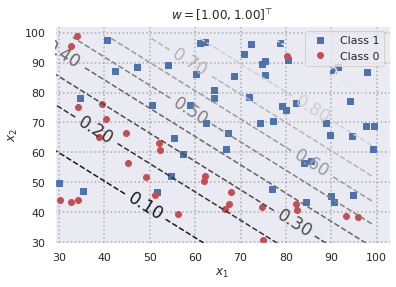

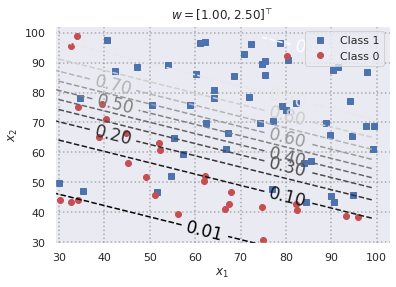

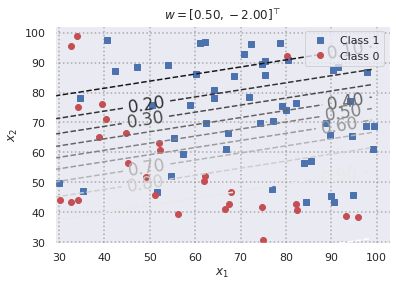

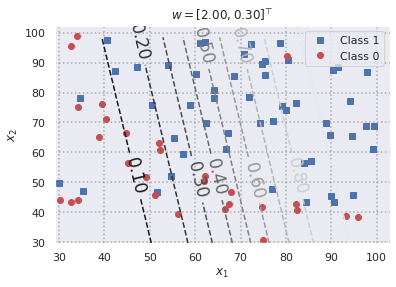

In [10]:
# Posibles vectores de parámetros
v_w = np.array([[1,1],
                [1,2.5],
                [0.5,-2],
                [2,.3]])

w0 = 0

n_w = v_w.shape[0]

# Número de bins para el histograma
nbins = 6

# Obtenemos una rejilla de puntos en los que evaluaremos nuestro RL 
# LA REJILLA SE DEFINE EN EL ESPACIO ORIGINAL DE LOS DATOS (ANTES DE NORMALIZAR)
x1,x2 = np.mgrid[min1:max1:(max1-min1)/50, min2:max2:(max2-min2)/50]
grid = np.transpose(np.row_stack([x1.ravel(), x2.ravel()]))
# Normalizamos la rejilla
grid_norm = transformer1.transform(grid)

values = [0.01] + list(np.arange(0.1,1,0.1)) + [0.99] 

print(r"Cada línea representa puntos del plano (x_1,x_2) con igual probabilidad P(y=1|x)")

for iw in range(n_w):
    
    fx, ax = plt.subplots()
    
    w = v_w[iw,:]
    # Calculamos P(Y=1|X) para todos los puntos de train
    z = 1./(1+np.exp(-X1_train.dot(w)-w0))
    # Histograma de las probabilidades
    hist, bin_edges = np.histogram(z, nbins)
    # Calculamos P(Y=1|X) para todos los puntos de la rejilla
    zgrid = 1./(1+np.exp(-grid_norm.dot(w)-w0))
    
    index=(Y1_train==1)
    ax.plot(X01_train[index,0],X01_train[index,1],'s',label="Class 1")
    index=(Y1_train==0)
    ax.plot(X01_train[index,0],X01_train[index,1],'ro',label="Class 0")
    ax.set_xlabel(r'$x_1$')
    ax.set_ylabel(r'$x_2$')
    ax.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
    ax.set_title("$w=[{0:.2f}, {1:.2f}]^\\top$".format(w[0],w[1]))
    CS = ax.contour(x1,x2,np.reshape(zgrid,np.shape(x1)),values,cmap=cm.gray,linestyles='dashed')
    ax.clabel(CS, inline=1, fontsize=17)
    ax.legend(loc='upper right')

### 1.5. Inferencia
---

#### 1.5.1. En pocas palabras: optimizar una función de coste

Para seleccionar el vector $\mathbf{w}$, RL resuelve el siguiente problema de optimización:

$$l({\bf w}) = \sum_{i=1}^N - \left\lbrace  y^{(i)}\log \left(  P(Y=1| {\bf x}^{(i)})\right)  + (1-y^{(i)}) \log\left(  1- P(Y=1| {\bf x}^{(i)}) \right)  \right\rbrace $$

$${\bf w}^* =\displaystyle \underset{{\bf w}}{\operatorname{min}} l({\bf w})$$

- Que no es más que intentar alinear las regiones de probabilidades constantes con **las probabilidades de las etiquetas reales**.
- Este problema no tiene solución cerrada. Se resuelve con optimización numérica.

--- 

#### 1.5.2. La teoría de probabilidad y cálculo que hay detrás


Recuerda que la idea de la clasificación paramétrica es usar las muestras de entrenamiento $D = \{({\bf x}^{(n)}, y^{(n)}) \in {\mathbb{R}}^D \times \{0,1\}, n=1,\ldots,N\}$ para ajustar el vector de los parámetros ${\bf w}$ de acuerdo a cierto criterio. Entonces, la estimación $\hat{\bf w}$ se puede usar para calcular la etiqueta de predicción de cualquier observación como 

$$\hat{y} = \arg\max_y P_{Y|{\bf X}}(y|{\bf x},\hat{\bf w}).$$

Necesitamos aún elegir un criterio para optimizar con la selección del vector de parámetros. Dos enfoques diferentes para la estimación de ${\bf w}$ son:

   * Maximum Likelihood (ML): $\hat{\bf w}_{\text{ML}} = \arg\max_{\bf w} P_{D|{\bf W}}(D|{\bf w})$
   * Maximum *A Posteriori* (MAP): $\hat{\bf w}_{\text{MAP}} = \arg\max_{\bf w} p_{{\bf W}|D}({\bf w}|D)$

**Estimación ML**

La estimación ML se define como

$$\hat{\bf w}_{\text{ML}} = \arg\max_{\bf w} P_{D|{\bf W}}(D|{\bf w})
   = \arg\min_{\bf w} L({\bf w})
$$

donde $L({\bf w})$ es la función **negative log-likelihood**, dada por

$$
L({\bf w}) = - \log P_{D|{\bf W}}(D|{\bf w})
 = - \log\left[P\left(y^{(1)},\ldots,y^{(N)}|
     {\bf x}^{(1)},\ldots, {\bf x}^{(N)},{\bf w}\right)\right]
$$

Usando una serie de suposiciones y cálculo matemático, podemos llegar a la siguiente formulación:

\begin{align}
L({\bf w}) = \sum_{n=1}^N\log\left[1+e^{-\overline{y}^{(n)}{\bf w}^\intercal {\bf z}^{(n)}}\right]
\end{align}

donde ${\bf z}^{(n)}={\bf z}({\bf x}^{(n)})$.

Se puede demostrar además que $L({\bf w})$ es una función y convexa diferenciable en ${\bf w}$. Por lo tanto, su mínimo es un punto con gradiente nuelo.

\begin{align}
\nabla_{\bf w} L(\hat{\bf w}_{\text{ML}}) = - \sum_{n=1}^N 
       \frac{e^{-\overline{y}^{(n)}\hat{\bf w}_{\text{ML}}^\intercal {\bf z}^{(n)}} \overline{y}^{(n)} {\bf z}^{(n)}}
       {1+e^{-\overline{y}^{(n)}\hat{\bf w}_{\text{ML}}^\intercal {\bf z}^{(n)}
       }} = 0
\end{align}

Desafortunadamente, $\hat{\bf w}_{\text{ML}}$ no se puede sacar de la ecuación y es necesario aplicar algún modelo iterativo de optimización para buscar el mínimo de la función *negative log-likelihood*. 


**Descenso por gradiente.**

Un simple algoritmo de optimización iterative es el <a href = https://en.wikipedia.org/wiki/Gradient_descent> descenso por gradiente</a>. 

\begin{align}
{\bf w}_{i+1} = {\bf w}_i - \rho_i \nabla_{\bf w} L({\bf w}_i)
\end{align}

donde $\rho_i >0$ es el *learning step*.

Aplicando la regla del descenso por gradiente a la regresión logística, obtenemos el siguiente algoritmo:

\begin{align}
{\bf w}_{i+1} &= {\bf w}_i 
    + \rho_i \sum_{n=1}^N \left[y^{(n)}-\sigma({\bf w}_i^\intercal {\bf z}^{(n)})\right] {\bf z}^{(n)}
\end{align}

----
Con todos estos conceptos nuevos, que sé que en principio pueden parecer muy complicados, sólo quiero que te quedes un poco con el proceso en general, con la aplicación de la teoría de la probabilidad y también con la necesidad de modelos de optimización. Así, a la hora de usar un modelo de scikit-learn, sepas qué significan algunos de los hiperparámetros más usuales, como el *learning rate*, y puedas ajustarlos de la mejor manera posible.

### 1.6. Ejemplo de una regresión logística lineal

En primer lugar, vamos a ver un ejemplo de una regresión logística lineal, es decir sin aplicar ninguna trasnformación $\mathbf{z}(\mathbf{x})$ a las variables de entrada. Para ello usaremos la librería de Scikit-learn, por lo que no es necesario programar ninguna de las ecuaciones vistas anteriormente, pero sí darle valor a algún hiperparámetro como sería el *learning rate*.

Para ello, vamos a continuar con el mismo ejemplo de datos anterior, pero procederemos a entrenar una regresión logística con los parámetros por defecto en sklearn (luego hablaremos del entrenamiento en sí  y qué parámetros nos ofrece la [implementación de sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)).

In [11]:
mi_RL1 = LogisticRegression(C=1e8)  # C es el parámetro de regularización. Un valor muy alto significa que no regularizamos el modelo.
# Luego hablamos de esto

# Entrenamos el modelo
mi_RL1.fit(X1_train, Y1_train)


LogisticRegression(C=100000000.0)

Los pesos del modelo entrenado son los siguientes

In [12]:
print("El vector w es")
print(mi_RL1.coef_)
print("Y el sesgo w0 es")
print(mi_RL1.intercept_)

El vector w es
[[1.19892427 1.39103289]]
Y el sesgo w0 es
[0.97475346]


Dibujemos primero la frontera de decisión $P(y=1|\mathbf{x})=0.5$

<ipython-input-14-d3d734e6cf89>:15: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)


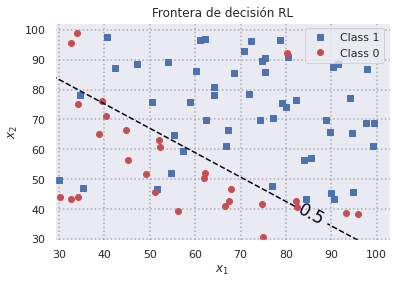

In [14]:
# Estimamos la probabilidad asociada a cada punto con el método .predic_proba
probs_LR1 = mi_RL1.predict_proba(grid_norm)

fig, ax = plt.subplots()
## Dibujamos los datos de entrenamiento
plt.plot(X01_train[Y1_train==1,0], X01_train[Y1_train==1,1], 's', label="Class 1")
plt.plot(X01_train[Y1_train==0,0], X01_train[Y1_train==0,1], 'ro', label="Class 0")
cs = ax.contour(x1, x2, np.reshape(probs_LR1[:,1], np.shape(x1)), [0.5], linestyles='dashed')
ax.clabel(cs, inline=1, fontsize=17)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend(loc='upper right')
plt.title(r'Frontera de decisión RL')
# Lineas principales de la rejilla
plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
plt.show()

Y a continuación el mapa de probabilidades final ...

<ipython-input-15-45e0e3c2c8a3>:13: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)


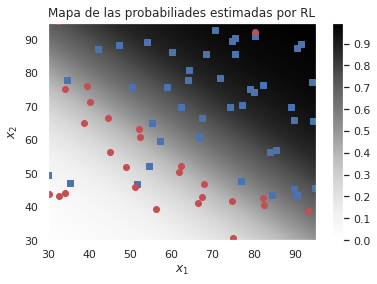

In [15]:
fig, ax = plt.subplots()
## Dibujamos los datos de entrenamiento
plt.plot(X01_train[Y1_train==1,0], X01_train[Y1_train==1,1],'s',label="Class 1")
plt.plot(X01_train[Y1_train==0,0], X01_train[Y1_train==0,1],'ro',label="Class 0")
cs = ax.contourf(x1, x2, np.reshape(probs_LR1[:,1], np.shape(x1)), np.arange(0,1,0.005), linestyles='dashed',cmap='Greys')
cbar = fig.colorbar(cs)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.xlim([30, 95])
plt.ylim([30, 95])
plt.title('Mapa de las probabiliades estimadas por RL')
# Lineas principales de la rejilla
plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
plt.show()

Antes de seguir, compactemos el código para representar figuras como las que ya hemos visto en una función, con esto ahorraremos muchas líneas de código.

In [42]:
def muestra_frontera(X_train,Y_train,x1_grid=None,x2_grid=None,probs_grid=None,dataset=False,frontera=False,thresholds=[0.5],
                     prob_levels=False, titulo='Datos',xlabel='$x_1$',ylabel='$x_2$'):
    
    """
    - dataset=True --> Representamos solo el dataset
    - frontera=True --> Representamos dataset con frontera de decisión (podemos especificar mas niveles con thresholds)
    - prob_levels=True --> Representamos dataset con curvas de nivel de probabilidad de clase 1.
    """
    
    # Identificamos clases
    clases = np.unique(Y_train).astype(np.int32)
    labels = ['Class ' + str(int(c)) for c in clases]
    
    if(dataset==True):
        
        # Dibujamos únicamente dataset
        plt.figure()
        for c in clases:
            plt.plot(X_train[Y_train==c, 0], X_train[Y_train==c, 1], 's', label=labels[c])
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.legend(loc='upper right')
        plt.title(titulo)
        plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
        plt.show()
    
    if(frontera==True):
        
        # Dibujamos dataset + líneas de contorno definidas en `thresholds`
        fig,ax = plt.subplots()
        for c in clases:
            plt.plot(X_train[Y_train==c, 0], X_train[Y_train==c, 1], 's', label=labels[c])
        cs=ax.contour(x1_grid, x2_grid, np.reshape(probs_grid[:, 1], np.shape(x1)), thresholds, linestyles='dashed', colors=['r', 'b', 'g'])
        ax.clabel(cs, inline=1, fontsize=12)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.legend(loc='upper right')
        plt.title(titulo)
        plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
        plt.show()

    if(prob_levels==True):
        
        # Dibujamos dataset + mapa de probabilidades
        fig,ax = plt.subplots()
        for c in clases:
            plt.plot(X_train[Y_train==c, 0], X_train[Y_train==c, 1], 's', label=labels[c])
        cs = ax.contourf(x1_grid, x2_grid, np.reshape(probs_grid[:,1], np.shape(x1)), np.arange(0,1.1,0.0005), linestyles='dashed', cmap='Greys')
        cbar = fig.colorbar(cs)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.legend(loc='upper right')
        plt.title(titulo)
        plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
        plt.show()
    


### 1.6. Ejemplo de una regresión logística no lineal

Vamos a considerar un nuevo dataset y repetir el experimento. 

In [17]:
data_ejemplo2 = pd.read_csv('http://www.tsc.uc3m.es/~olmos/BBVA/ejemplo2.txt', header=None)

data_ejemplo2.head(10)

,0,1,2
0,-15.889864,45.918416,1.0
1,-17.041936,45.865784,1.0
2,-18.009680,45.892100,1.0
3,-19.300000,45.207884,1.0
4,-20.406000,45.076304,1.0
5,-20.498160,44.155280,1.0
6,-19.484320,43.523685,1.0
7,-18.747040,42.707900,1.0
8,-16.166360,41.944736,1.0
9,-15.244720,41.549996,1.0


> **Ejercicio:** Complete el siguiente código, en el que normalizamos el dataset y lo representamos antes y después de normalizar (sólo hay que completar líneas en las que hay presente un `<SOL>`)

El conjunto de datos de entrenamiento consta 94 observaciones de 2 dimensiones



<ipython-input-16-2014d18f9b17>:24: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)


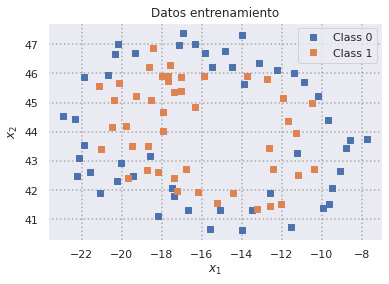

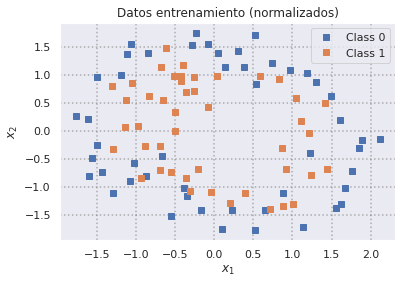

In [18]:
data = np.array(data_ejemplo2)

## Dimensiones
dims = np.shape(data)
N = dims[0]

## Separamos X e Y
#<SOL> 
X2 = data[:, 0:2]   #<SOL>
Y2 = data[:, 2]  
#<\SOL> 

# Separamos train (80%) de test (20%)
#<SOL> 
X02_train, X02_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.2, random_state=50)
#<\SOL> 

# Variables para la representación de la frontera de decisión (antes de normalizar!)
min1 = np.min(X02_train[:,0])
max1 = np.max(X02_train[:,0])
min2 = np.min(X02_train[:,1])
max2 = np.max(X02_train[:,1])

print("El conjunto de datos de entrenamiento consta {0:d} observaciones de {1:d} dimensiones\n".format(X02_train.shape[0], X02_train.shape[1]))

# Normalizamos los datos (media 0, varianza 1)
#<SOL>
transformer2 = StandardScaler().fit(X02_train)   
X2_train = transformer2.transform(X02_train)    
X2_test = transformer2.transform(X02_test) 
#<\SOL>

# Representaciones usando la función muestra_frontera
muestra_frontera(X_train=X02_train, Y_train=Y2_train, dataset=True, titulo='Datos entrenamiento')

# Representaciones usando la función muestra_frontera
muestra_frontera(X_train=X2_train, Y_train=Y2_train, dataset=True, titulo='Datos entrenamiento (normalizados)')

> **Ejercicio:** Complete el siguiente código, en el que entrenamos un regresor logístico con los parámetros por defecto (C=1e8) y representamos la frontera de decisión.

<ipython-input-16-2014d18f9b17>:39: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)


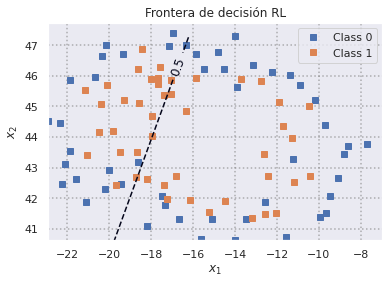

In [19]:
#<SOL>
mi_RL2 = LogisticRegression(C=1e8)    #<SOL>    
#</SOL>

#Entrenamos mi_RL2 usando los datos normalizados
#<SOL>
mi_RL2.fit(X2_train,Y2_train) 
#</SOL>

#Obtenemos una rejilla de puntos en los que evaluaremos nuestro RL
x1, x2 = np.mgrid[min1:max1:(max1-min1)/50, min2:max2:(max2-min2)/50]
grid = np.transpose(np.row_stack([x1.ravel(), x2.ravel()]))

# Normalizamos la rejilla
#<SOL>
grid_norm = transformer2.transform(grid)   
#</SOL>

#Estimamos la probabilidad asociada a cada punto con el método .predic_proba
#<SOL>
probs_LR2 = mi_RL2.predict_proba(grid_norm)   
#</SOL>

# Representaciones usando la función muestra_frontera
muestra_frontera(x1_grid=x1, x2_grid=x2, probs_grid=probs_LR2, X_train=X02_train, Y_train=Y2_train, frontera=True, titulo='Frontera de decisión RL')



Obviamente, en este dataset no podemos esperar que una separación líneal funcione correctamente. De hecho, podemos calcular el número de etiquetas correctamente clasificadas tanto en train como test del siguiente modo:

In [20]:
accuracy_train = mi_RL2.score(X2_train, Y2_train)
accuracy_test = mi_RL2.score(X2_test, Y2_test)

print("Accuracy train {0:f}%. Accuracy test {1:f}%\n".format(accuracy_train*100, accuracy_test*100))


Accuracy train 56.382979%. Accuracy test 33.333333%



Una transformación de las variables de entrada nos permitirá generalizar la frontera de decisión. En particular, vamos a incluir transformaciones polinómicas tal y como hicisteis en el caso de regresión:

$$\mathbf{x} = [x_1,x_2] ~~ \Rightarrow \phi(\mathbf{x})= [x_1,x_2,x_1^2,x_2^2,x_1x_2]$$

de tal manera que ahora entrenaremos un RL del tipo

$$P(Y=1| {\bf x}) =  \frac{1}{1+e^{-({\bf w}^T {\phi(\mathbf{x})}+w_0)}}=\sigma({\bf w}^T {\phi(\mathbf{x})}+w_0)$$

Y la frontera de decisión viene dada por la ecuación

$$ {\bf w}^T {\phi(\mathbf{x})}+w_0 = 0$$

que en este caso **corresponde a la ecuación de una elipse** (en el espacio $(x_1,x_2)$).

In [21]:
poly_grado2 = PolynomialFeatures(2,include_bias=False) #No usamos x^0 = 1

In [22]:
# Añadimos las transformaciones en el espacio original de los datos

X02_train_grado2 = poly_grado2.fit_transform(X02_train)
#Xpoly_grado2.fit(X02_train)
#X02_train_grado2 = poly_grado2.transform(X02_train)

X02_test_grado2 = poly_grado2.transform(X02_test)

print("El conjunto de datos de entrenamiento consta {0:d} observaciones de {1:d} dimensiones\n".format(X02_train_grado2.shape[0], X02_train_grado2.shape[1]))


El conjunto de datos de entrenamiento consta 94 observaciones de 5 dimensiones



> **Ejercicio:** Complete el siguiente código, en el que normalizamos `X02_train_grado2` y `X02_test_grado2`, entrenamos un RL con los parámetros por defecto (C=1e8) y representamos la frontera de decisión.

<ipython-input-16-2014d18f9b17>:39: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)


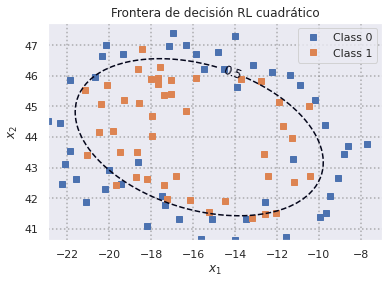

<ipython-input-16-2014d18f9b17>:54: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)


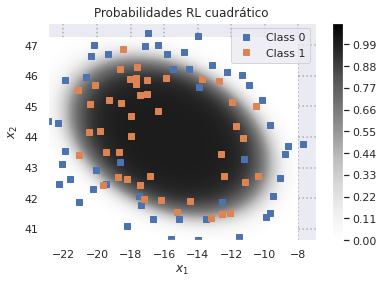

In [23]:
# Normalizamos los datos (media 0, varianza 1)
#<SOL>
transformer_grado2 = StandardScaler().fit(X02_train_grado2)    
X2_train_grado2 = transformer_grado2.transform(X02_train_grado2)    
X2_test_grado2 = transformer_grado2.transform(X02_test_grado2)  
#</SOL>

# Entrenamos el regresor logístico
#<SOL>
mi_RL2_grado2 = LogisticRegression(C=1e8)     
mi_RL2_grado2.fit(X2_train_grado2,Y2_train)  
#</SOL>

#Obtenemos una rejilla de puntos en los que evaluaremos nuestro RL (espacio original de los datos!)
x1,x2 = np.mgrid[min1:max1:(max1-min1)/50, min2:max2:(max2-min2)/50]
grid = np.transpose(np.row_stack([x1.ravel(), x2.ravel()]))
# Añadimos las características polinómicas a la rejilla 
#<SOL>
grid_ext = poly_grado2.transform(grid)    
#</SOL>

# Normalizamos la rejilla
#<SOL>
grid_norm = transformer_grado2.transform(grid_ext)   
#</SOL>

#Estimamos la probabilidad asociada a cada punto con el método .predic_proba
#<SOL>
probs_LR_grado2 = mi_RL2_grado2.predict_proba(grid_norm)   
#</SOL>

# Representaciones usando la función muestra_frontera
muestra_frontera(x1_grid=x1, x2_grid=x2, probs_grid=probs_LR_grado2, X_train=X02_train_grado2, Y_train=Y2_train,
                 frontera=True, titulo=r'Frontera de decisión RL cuadrático')

muestra_frontera(x1_grid=x1, x2_grid=x2, probs_grid=probs_LR_grado2, X_train=X02_train_grado2, Y_train=Y2_train,
                 prob_levels=True, titulo=r'Probabilidades RL cuadrático')

Obviamente el resultado es mucho mejor. Imprimamos el porcentaje de etiquetas acertadas ...

In [24]:
accuracy_train = mi_RL2_grado2.score(X2_train_grado2,Y2_train)
accuracy_test = mi_RL2_grado2.score(X2_test_grado2, Y2_test)

print("Accuracy train {0:.2f}%. Accuracy test {1:.2f}%\n".format(accuracy_train*100, accuracy_test*100))

Accuracy train 84.04%. Accuracy test 83.33%



#### 1.6.1 Visualización del sobreajuste

Comprobemos ahora qué ocurre si añadimos extensiones polinómicas hasta orden 20. El siguiente código (muy parecido al anterior) realiza dicho experimento ...

In [25]:
poly_grado20 = PolynomialFeatures(20, include_bias=False) #No usamos x^0 = 1

X02_train_grado20 = poly_grado20.fit_transform(X02_train)

X02_test_grado20 = poly_grado20.transform(X02_test)

print("El conjunto de datos de entrenamiento consta {0:d} observaciones de {1:d} dimensiones\n".format(X02_train_grado20.shape[0], X02_train_grado20.shape[1]))


El conjunto de datos de entrenamiento consta 94 observaciones de 230 dimensiones



> **Ejercicio:** Complete el siguiente código, en el que normalizamos `X02_train_grado20` y `X02_test_grado20`, entrenamos un RL con los parámetros por defecto (C=1e8) y representamos la frontera de decisión.

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-16-2014d18f9b17>:39: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)


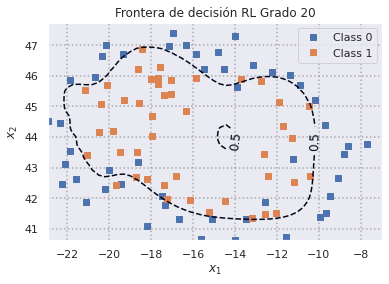

<ipython-input-16-2014d18f9b17>:54: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)


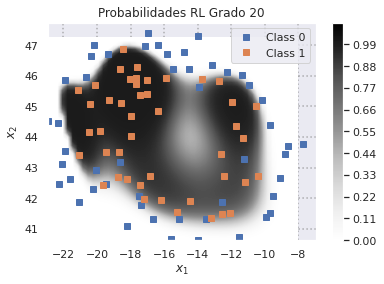

In [26]:
# Normalizamos los datos (media 0, varianza 1)
#<SOL>
transformer_grado20 = StandardScaler().fit(X02_train_grado20)   
X2_train_grado20 = transformer_grado20.transform(X02_train_grado20)  
X2_test_grado20 = transformer_grado20.transform(X02_test_grado20)   
#</SOL>

# Entrenamos el regresor logístico
mi_RL2_grado20 = LogisticRegression(C=1e8, max_iter=1e04)    
#<SOL>
mi_RL2_grado20.fit(X2_train_grado20, Y2_train) 

#</SOL>

#Obtenemos una rejilla de puntos en los que evaluaremos nuestro RL (espacio original de los datos!)
grid_ext = poly_grado20.transform(grid)

# Normalizamos la rejilla
#<SOL>
grid_norm = transformer_grado20.transform(grid_ext)   
#</SOL>


#Estimamos la probabilidad asociada a cada punto con el método .predic_proba
#<SOL>
probs_LR_grado20 = mi_RL2_grado20.predict_proba(grid_norm)   
#</SOL>

# Representaciones usando la función muestra_frontera
muestra_frontera(x1_grid=x1, x2_grid=x2, probs_grid=probs_LR_grado20, X_train=X02_train_grado20, Y_train=Y2_train,
                 frontera=True, titulo='Frontera de decisión RL Grado 20')

muestra_frontera(x1_grid=x1, x2_grid=x2, probs_grid=probs_LR_grado20, X_train=X02_train_grado20, Y_train=Y2_train,
                 prob_levels=True, titulo='Probabilidades RL Grado 20')

Podemos apreciar claramente una **predición mucho mas sobreajustada y sensible a la distribución** de los puntos de entrenamiento. El efecto del sobreajuste es evidente si comparamos la fracción de etiquetas correctamente detectada en el conjunto de training y de test.

In [27]:
accuracy_train = mi_RL2_grado20.score(X2_train_grado20,Y2_train)
accuracy_test = mi_RL2_grado20.score(X2_test_grado20,Y2_test)

print("Accuracy train {0:.2f}%. Accuracy test {1:.2f}%\n".format(accuracy_train*100, accuracy_test*100))

Accuracy train 90.43%. Accuracy test 75.00%



Como podemos ver, ahora en el conjunto de entrenamiento hemos mejorado sensiblemente, pero no así en el de test. Si representamos la frontera de decisión frente al conjunto de test podemos  apreciar muchos puntos mal clasificados.

<ipython-input-16-2014d18f9b17>:39: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)


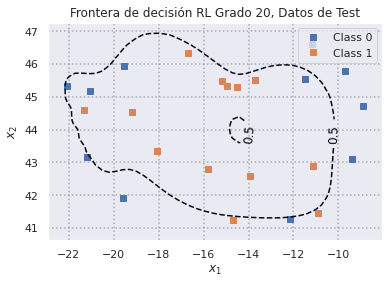

In [28]:
muestra_frontera(x1_grid=x1, x2_grid=x2, probs_grid=probs_LR_grado20, X_train=X02_test_grado20, Y_train=Y2_test,
                 frontera=True, titulo='Frontera de decisión RL Grado 20, Datos de Test')

Una forma alternativa de detectar que un modelo paramétrico como RL está sobreajustado es mirar la magnitud de los pesos (igual que en el caso de regresión lineal), donde podemos comprobar que cuanto más sobreajuste, más valores extremos obtenemos.

<ipython-input-29-f363447e0aee>:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)


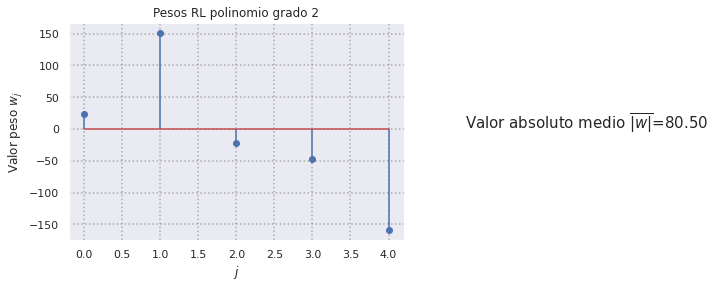

<ipython-input-29-f363447e0aee>:17: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)


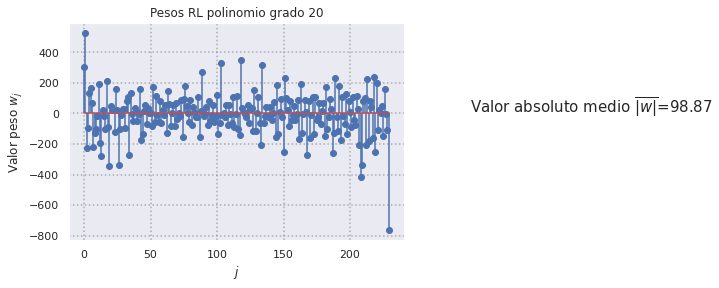

In [29]:
fig, ax = plt.subplots()
plt.stem(mi_RL2_grado2.coef_.T,use_line_collection=True)
plt.xlabel(r'$j$')
plt.ylabel(r'Valor peso $w_j$')
plt.title('Pesos RL polinomio grado 2')
plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
ax.text(5, 0, r'Valor absoluto medio $\overline{|w|}$='+'{0:.2f}'.format(np.mean(np.abs(mi_RL2_grado2.coef_))), fontsize=15)
plt.show()



fig, ax = plt.subplots()
plt.stem(mi_RL2_grado20.coef_.T,use_line_collection=True)
plt.xlabel(r'$j$')
plt.ylabel(r'Valor peso $w_j$')
plt.title('Pesos RL polinomio grado 20')
plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
ax.text(290, 0, r'Valor absoluto medio $\overline{|w|}$='+'{0:.2f}'.format(np.mean(np.abs(mi_RL2_grado20.coef_))), fontsize=15)
plt.show()

### 1.7 Regularización en Regresión Logística
---

Podemos penalizar la magnitud de los pesos añadiendo un término de **regularización** en la función de coste del RL:


* Regularización cuadrática (L2):

$$ \bf w^* = \displaystyle \underset{{\bf w}}{\operatorname{min}} l({\bf w}) + \frac{1}{C} \Vert {\bf w} \Vert_2^2$$

* Regularización absoluta (L1):

$$ \bf w^* = \displaystyle \underset{{\bf w}}{\operatorname{min}} l({\bf w}) + \frac{1}{C} \Vert {\bf w} \Vert_1$$

donde $l({\bf w})$ es la función de coste de RL que vimos anteriormente. Tal y como visteis en el caso de regresión, L2 consigue una regularización más uniforme a lo largo de todos los pesos (y algo mejor de precisión de clasificación ya que tiene más grados de libertad), mientras que con L1 la solución tiende a ser *sparse*, muchos pesos se van a cero y esto nos permite determinar qué características de entrada son más relevantes para el modelo.

La [implementación de RL en sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) nos permite seleccionar de forma sencilla el tipo de regularización y el parámetro $C$.


Para el último ejemplo (expansión polinómica de grado 20), vamos a validar $C$ utilizando [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) y analizar el resultado. 

In [31]:
from sklearn.model_selection import GridSearchCV

rango_C = np.logspace(-3, 3, 10)  # Rango C en escala logarítmica (base 10). Esto es, 20 puntos desde 10^3, a 10^3.
#<SOL>
diccionario_parametros = {'C': rango_C}

#</SOL>
nfold = 10 # Número de particiones train/validación

""" Ajusto C por validación cruzada
El optimizador por defecto ('lbfgs') no acepta regularización l1. 
Usamos 'liblinear' siguiendo las recomendaciones de la librería.
"""
mi_LR2_grado20_CV  = GridSearchCV(estimator=LogisticRegression(penalty='l1', max_iter=1e08, solver='liblinear'),
                                  param_grid=diccionario_parametros, cv=nfold)
# Entrenar el modelo
#≤<OL>
mi_LR2_grado20_CV.fit(X2_train_grado20, Y2_train)   
#</SOL>

print("El mejor parámetro C es {0:.2f}".format(mi_LR2_grado20_CV.best_params_['C']))
                        
# Score de clasificación en train/test
#<SOL>
accuracy_train = mi_LR2_grado20_CV.score(X2_train_grado20, Y2_train)   
accuracy_test = mi_LR2_grado20_CV.score(X2_test_grado20, Y2_test) 
#</SOL>

print("Accuracy train {0:.2f}%. Accuracy test {1:.2f}%\n".format(accuracy_train*100, accuracy_test*100))


El mejor parámetro C es 10.00
Accuracy train 82.98%. Accuracy test 83.33%



Dibujemos los pesos y la correspondiente región de decisión

<ipython-input-32-949a2d3e0f07>:7: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)


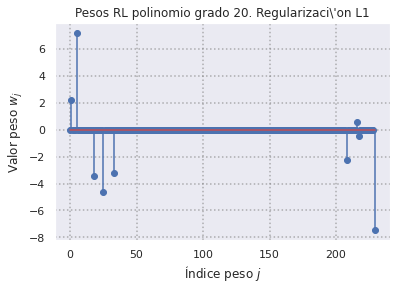

In [32]:
fig, ax = plt.subplots()

plt.stem(mi_LR2_grado20_CV.best_estimator_.coef_.T,use_line_collection=True)
plt.xlabel(r'Índice peso $j$')
plt.ylabel(r'Valor peso $w_j$')
plt.title(r'Pesos RL polinomio grado 20. Regularizaci\'on L1')
plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
plt.show()



<ipython-input-16-2014d18f9b17>:39: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)


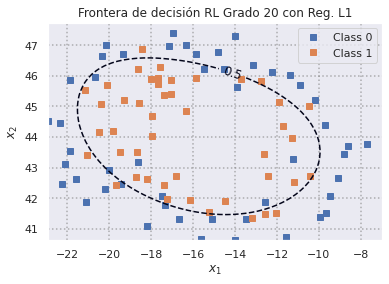

In [33]:
#Estimamos la probabilidad asociada a cada punto con el método .predic_proba
probs_LR_grado20_CV = mi_LR2_grado20_CV.best_estimator_.predict_proba(grid_norm)

# Representaciones usando la función muestra_frontera
muestra_frontera(x1_grid=x1, x2_grid=x2, probs_grid=probs_LR_grado20_CV, X_train=X02_train_grado20, Y_train=Y2_train,
                 frontera=True, titulo=r'Frontera de decisión RL Grado 20 con Reg. L1')

Podemos comprobar cómo sin ser exactamente una elipse, la solución es muy parecida a la obtenida con una expansión polinómica de grado dos.

### 1.8. Medida de prestaciones en clasificación binaria
---

- Hasta ahora hemos comparado los distintos clasificadores en base a una métrica, la fracción de etiquetas de train/test correctamente detectadas (*accuracy* en inglés). 
$$$$
- Sin embargo, **no todos los errores son equiparables**:
    - Por ejemplo en un problema de detectar correo spam,  etiquetar un correo válido como spam es un error que podemos considerar más grave que dejar de etiquetar un correo no deseado como spam.
    - En un problema de decisión de concesión de un préstamo, conceder un préstamo a una persona no solvente implica unas pérdidas mayores que dejar pasar a un cliente solvente.
    
En este sentido, utilizar únicamente la fracción de etiquetas de train/test correctamente detectadas puede no ser la mejor idea. Vamos a definir una serie de métricas que proporcionan un espectro más completo para caracterizar un clasificador.

En un problema binario, cuando el clasificador realiza una estimación para un nuevo dato podemos diferenciar **cuatro** posibles eventos:

| | **Predicción** $D=1$ | **Predicción** $D=0$ |
| --- | --- | --- |
| **Etiqueta real** $Y=1$  | True Positive (TP) | False Negative or Missing (FN)|
| **Etiqueta real** $Y=0$  |  False Positive or False Alarm (FP)  | True Negative (TN) | 

A partir de estos eventos medidos sobre un conjunto de datos clasificados podemos definir las siguientes métricas:
* **Tasa de falsos positivos (o de falsa alarma)** es la razón entre el número de falsos positivos y el número total de datos con etiqueta real $Y=0$ (la fracción de negativos que se nos han colado como positivos):

$$ FPR = \frac{\# FP}{ \# TN + \# FP }$$

* **Especificidad** o *true negative rate* es la razón entre el número de etiquetas negativas correctamente detectadas y el total de datos con etiqueta negativa $Y=0$ (qué fracción de negativos he conseguido detectar del total de negativos):

$$ E = \frac{\# TN}{\# TN + \# FP} = 1- FPR$$


* **Tasa de falsos negativos (o de pérdidas)** es la razón entre el número falsos negativos y el total de datos con etiqueta positiva $Y=1$ (la fracción de positivos que se nos han colado como negativos):

$$ FNR = \frac{\# FN}{ \# TP + \# FN }$$


* **Sensibilidad** o *recall* o *true positive rate* es la razón entre el número de etiquetas positivas correctamente detectadas y el total de datos con etiqueta positiva $Y=1$ (qué fracción de positivos he conseguido detectar del total de positivos):

$$ R = \frac{\# TP}{\# TP + \# FN} = 1- FNR$$


* **Precisión** es la razón entre el número de etiquetas positivas correctamente detectadas y el número total de datos **clasificados** con etiqueta positiva (qué fracción de los que yo he detectado como $Y=1$ realmente lo son):

$$ P = \frac{\# TP}{\# TP + \# FP}$$

La siguiente figura ayuda a entender las anteriores métricas [Wikipedia](https://en.wikipedia.org/wiki/Precision_and_recall)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/700px-Precisionrecall.svg.png" width="30%"> 

La precisión (P) y el *recall* (R) suelen combinarse en una única métrica denominada **F-score** o **F1-score**:

$$F_{\text{score}} = 2 \frac{P\cdot R}{P+R}$$

Esta métrica varía entre 0 (peor caso) y 1 (mejor caso).

#### Regresión Logistica L2 en dataset de Spam

En este apartado, estudiaremos diferentes métricas de clasificación en un problema más real, con más muestras y variables, sobre detección de correo spam.

#### Spam detection database
- 4601 observaciones (1813 spam, 39.4%)
- target binario: spam ($y=1$) o no spam ($y=0$)
- No disponemos de los textos, las observaciones están formadas por 57 variables continuas
  - 48 variables reales continuas en el intervalo [0,100] *word_freq_WORD*: frecuencia de aparición de la palabra *WORD* en el correo (en porcentaje)
  - 6 variables reales continuas en el intervalo [0,100] *char_freq_CHAR*: frecuencia de aparición del caracter *CHAR* en el correo (porcentaje)
  - 1 variable real continua: longitud promedio de secuencias de caracteres en mayúscula ininterrumpidos
  - 1 variable entera continua: longitud de la secuencia de mayúsculas ininterrumpida más larga
  - 1 variable entera continua: número total de mayúsculas en el correo
  

In [34]:
def load_spam():
    data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data',header=None)
    data.columns=["wf_make",         
        "wf_address",      
        "wf_all",          
        "wf_3d",           
        "wf_our",          
        "wf_over",         
        "wf_remove",       
        "wf_internet",     
        "wf_order",        
        "wf_mail",         
        "wf_receive",      
        "wf_will",         
        "wf_people",       
        "wf_report",       
        "wf_addresses",    
        "wf_free",         
        "wf_business",     
        "wf_email",        
        "wf_you",          
        "wf_credit",       
        "wf_your",         
        "wf_font",         
        "wf_000",          
        "wf_money",        
        "wf_hp",           
        "wf_hpl",          
        "wf_george",       
        "wf_650",          
        "wf_lab",          
        "wf_labs",         
        "wf_telnet",       
        "wf_857",          
        "wf_data",         
        "wf_415",          
        "wf_85",           
        "wf_technology",   
        "wf_1999",         
        "wf_parts",        
        "wf_pm",           
        "wf_direct",       
        "wf_cs",           
        "wf_meeting",      
        "wf_original",     
        "wf_project",      
        "wf_re",           
        "wf_edu",          
        "wf_table",        
        "wf_conference",   
        "cf_;",            
        "cf_(",            
        "cf_[",            
        "cf_!",            
        "cf_$",            
        "cf_#",            
        "cap_average", 
        "cap_longest", 
        "cap_total",
        "target"]
    return data

In [35]:
data = load_spam()
X0_spam = data[data.columns[:57]].values
Y_spam = data['target'].values

print("Cargadas {0:d} observaciones con {1:d} columnas\n".format(len(data), len(data.columns)))
print("Ejemplos")
data.head()

Cargadas 4601 observaciones con 58 columnas

Ejemplos


,wf_make,wf_address,wf_all,wf_3d,wf_our,wf_over,wf_remove,wf_internet,wf_order,wf_mail,...,cf_;,cf_(,cf_[,cf_!,cf_$,cf_#,cap_average,cap_longest,cap_total,target
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


> **Ejercicio:** Divida la base de datos en train (70%) y test (30%). Normalice la base de datos de acuerdo a los estadísticos del conjunto de entrenamiento

In [36]:
# Dividimos train/test. Normalizamos
#<SOL>
X0_spam_train, X0_spam_test, Y_spam_train, Y_spam_test = train_test_split(X0_spam, Y_spam, test_size=0.3, random_state=42) 
#</SOL>

# X0--> Datos originales, X --> Normalizados
#<SOL>
transformer_spam = StandardScaler().fit(X0_spam_train)   
X_spam_train = transformer_spam.transform(X0_spam_train) 
X_spam_test = transformer_spam.transform(X0_spam_test) 
#</SOL>


> **Ejercicio:** Complete el siguiente código. En el que se entrena un RL con regularización L2

In [39]:
# Entrenamiento RL con validación parámetro de regularización L2
rango_C = np.logspace(-2, 1, 20)  # Rango C en escala logarítmica (base 10). Esto es, 20 puntos desde 10^-2, a 10^1.
#<SOL>
diccionario_parametros = {'C': rango_C}
#</SOL>
nfold = 10 # Número de particiones train/validación

#<SOL>
RL_spam_L2  = GridSearchCV(estimator=LogisticRegression(penalty='l2', solver='liblinear'),param_grid=diccionario_parametros,cv=nfold)
#</SOL>

#Entrenamiento 
#<SOL>
RL_spam_L2.fit(X_spam_train,Y_spam_train)  
#</SOL>

#Cálculo del score
#<SOL>
accuracy_train_rl_l2 = RL_spam_L2.score(X_spam_train,Y_spam_train) 
accuracy_test_rl_l2 = RL_spam_L2.score(X_spam_test,Y_spam_test)
#</SOL>

print("El parámetro de regularización seleccionado es C={0:.2f}".format(RL_spam_L2.best_params_['C']))
print("Accuracy train {0:.2f}%. Accuracy test {1:.2f}%\n".format(accuracy_train_rl_l2*100, accuracy_test_rl_l2*100))

El parámetro de regularización seleccionado es C=0.09
Accuracy train 92.39%. Accuracy test 91.60%



Vamos a calcular algunas de estas métricas para el clasificador entrenado anteriormente. Usaremos las siguientes funciones directamente proporcionadas por [sklearn](https://scikit-learn.org/stable/modules/model_evaluation.html):

- [Precision score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html)
- [Recall score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)
- [F1 score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)

In [40]:
from sklearn.metrics import f1_score, recall_score, precision_score

# Métricas para el RL con regularización L2

precision_RL = precision_score(Y_spam_test, RL_spam_L2.predict(X_spam_test))
recall_RL = recall_score(Y_spam_test, RL_spam_L2.predict(X_spam_test))
F1_RL = f1_score(Y_spam_test, RL_spam_L2.predict(X_spam_test))

print("\n Precision P = {0:.2f}".format(precision_RL))
print("\n Recall R = {0:.2f}".format(recall_RL))
print("\n F1 score, F1 = {0:.2f}".format(F1_RL))


 Precision P = 0.93

 Recall R = 0.86

 F1 score, F1 = 0.90


#### Variando el umbral de detección

Hasta ahora, hemos supuesto que los distintos clasificadores deciden que la etiqueta asociada a un dato es aquella para la cual la probabilidad estimada es mayor que 0.5. Pero este valor, conocido como **umbral de decisión** es un hiperparámetro más que tenemos que fijar de acuerdo a nuestros requisitos de Precision, Recall, FPR o FNR.

Por ejemplo, si queremos maximizar el Recall en general tomaremos un umbral para detección de clase positiva por debajo de 0.5 (por ejemplo 0.2). 

- Esto incrementará la tasa de datos detectados como positivos y será mas dificil que se nos haya escapado alguno. 

- Pero también incrementará la tasa de falsos positivos y hará bajar la precisión. Esto es, las métricas típicamente están comprometidas unas con otras. 

Ilustremos estos compromisos entre métricas en el ejemplo 2D del comienzo del Notebook

<ipython-input-42-73d406e7d8e8>:39: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)


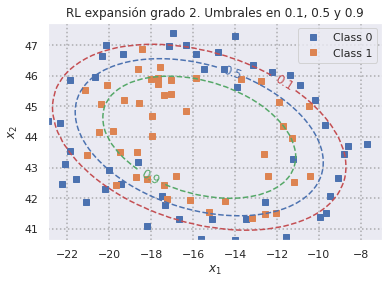

In [43]:
muestra_frontera(x1_grid=x1, x2_grid=x2, probs_grid=probs_LR_grado2, X_train=X02_train_grado2, Y_train=Y2_train,
                 frontera=True, thresholds=[0.1,0.5,0.9], titulo=r'RL expansión grado 2. Umbrales en 0.1, 0.5 y 0.9')

In [44]:
# Calculemos FPR y Recall para los tres umbrales

umbrales = [0.9, 0.5, 0.1]

R = []

FPR = []

for u in umbrales:
    
    # Implementamos las fórmulas de las métricas directamente, para mostrar 
    # que son sencillas (se pueden usar las funciones de sklearn)

    Y_pred = (mi_RL2_grado2.predict_proba(X2_train_grado2)[:,1]>=u)
    
    FP = np.sum((Y_pred==1) & (Y2_train==0))
    
    FN = np.sum((Y_pred==0) & (Y2_train==1))
    
    TP = np.sum((Y_pred==1) & (Y2_train==1))
    
    TN = np.sum((Y_pred==0) & (Y2_train==0))
    
    R.append(TP/(TP+FN))
    
    FPR.append(FP/(FP+TN))
    
    print('Umbral en {0:.2f}. Recall {1:.2f}. FPR {2:.2f}'.format(u,R[-1], FPR[-1]))


Umbral en 0.90. Recall 0.40. FPR 0.04
Umbral en 0.50. Recall 0.82. FPR 0.14
Umbral en 0.10. Recall 1.00. FPR 0.49


Para hacernos una idea global del compromiso entre las distintas métricas es habitual analizar la evolución del recall (R) frente a la tasa de falsos positivos (FPR) o bien frente a la precisión (P) a medida que variamos el umbral de decisión.

- En la curva **ROC** (receiver operating characteristic) mostramos la evolución del Recall frente a FPR.
- En la curva **Precision-Recall** mostramos la evolución de la precisión P frente al Recall.

En ambos casos, el comportamiento global se mide utilizando el **área bajo la curva** (AUC). Idealmente, es igual a 1.

Dibujemos estas curvas para el ejemplo anterior. Usando las funciones [roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) y [precision_recall_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html#sklearn.metrics.precision_recall_curve) de sklearn. Para el área bajo la curva usamos [roc_auc_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) y [average_precision_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.average_precision_score.html#sklearn.metrics.average_precision_score) respectivamente.

<ipython-input-45-80a49193e9ca>:12: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)


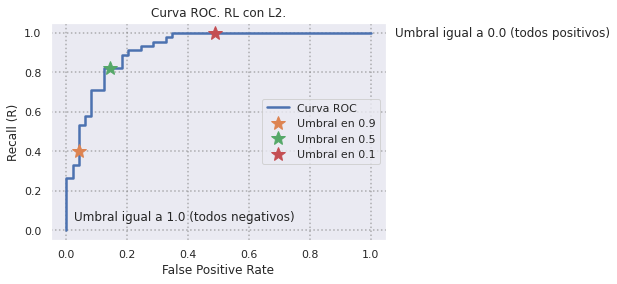

In [45]:
from sklearn import metrics

# ROC curve

fpr, recall, thresholds = metrics.roc_curve(Y2_train, mi_RL2_grado2.predict_proba(X2_train_grado2)[:,1], pos_label=1)

fig,ax = plt.subplots()
plt.plot(fpr,recall,lw=2.5,label='Curva ROC')
for ii,u in enumerate(umbrales):
    plt.plot(FPR[ii], R[ii],'*', ms=15, label='Umbral en '+str(u))
plt.legend(loc=7)
plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
plt.xlabel('False Positive Rate')
plt.ylabel('Recall (R)')
plt.title('Curva ROC. RL con L2.')

# Area bajo la curva ROC

area_roc = metrics.roc_auc_score(Y2_train, mi_RL2_grado2.predict_proba(X2_train_grado2)[:,1])

ax.text(1.08, 0.98, r'Umbral igual a 0.0 (todos positivos)')

ax.text(0.025, 0.05, r'Umbral igual a 1.0 (todos negativos)')

plt.show()


#### Curvas ROC y PR en Spam

Estudiemos las curvas ROC y PR en la base de datos Spam con el regresor lógistico con regularización L2

<ipython-input-46-d4b7bdf59003>:7: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)


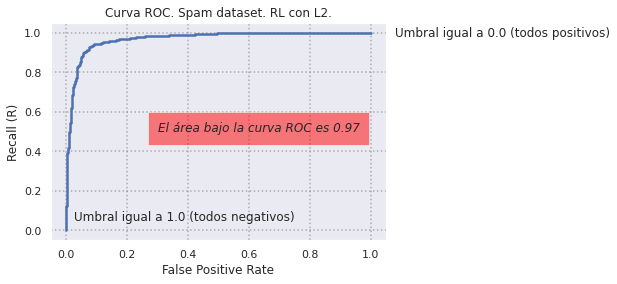

<ipython-input-46-d4b7bdf59003>:33: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)


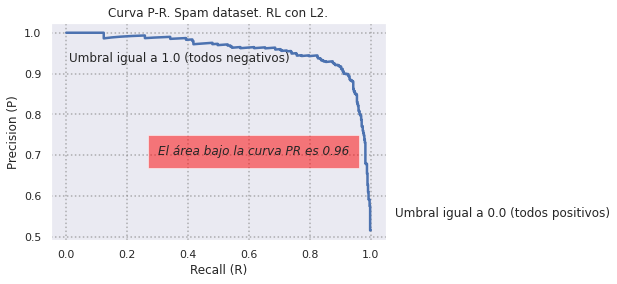

In [46]:
# ROC curve

fpr, recall, thresholds = metrics.roc_curve(Y_spam_test, RL_spam_L2.predict_proba(X_spam_test)[:,1], pos_label=1)

fig,ax = plt.subplots()
plt.plot(fpr, recall, lw=2.5)
plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
plt.xlabel('False Positive Rate')
plt.ylabel('Recall (R)')
plt.title('Curva ROC. Spam dataset. RL con L2.')

# Area bajo la curva ROC

area_roc = metrics.roc_auc_score(Y_spam_test, RL_spam_L2.predict_proba(X_spam_test)[:,1])

ax.text(1.08, 0.98, r'Umbral igual a 0.0 (todos positivos)')

ax.text(0.025, 0.05, r'Umbral igual a 1.0 (todos negativos)')

ax.text(0.3, 0.5, r"El área bajo la curva ROC es {0:.2f}".format(area_roc), style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})

plt.show()


# Precision-Recall Curve

precision, recall, thresholds = metrics.precision_recall_curve(Y_spam_test, RL_spam_L2.predict_proba(X_spam_test)[:,1], pos_label=1)


fig,ax = plt.subplots()
plt.plot(recall, precision,lw=2.5)
plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
plt.xlabel('Recall (R)')
plt.ylabel('Precision (P)')
plt.title('Curva P-R. Spam dataset. RL con L2.')


# Area bajo la curva ROC

area_roc = metrics.average_precision_score(Y_spam_test, RL_spam_L2.predict_proba(X_spam_test)[:,1])

ax.text(0.01, 0.93, r'Umbral igual a 1.0 (todos negativos)')

ax.text(1.08, 0.55, r'Umbral igual a 0.0 (todos positivos)')

ax.text(0.3, 0.7, r"El área bajo la curva PR es {0:.2f}".format(area_roc), style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})

plt.show()

Una vez que hemos escogido el punto de trabajo en la curva ROC o PR, es interesante dibujar ambas curvas ya en función del umbral:

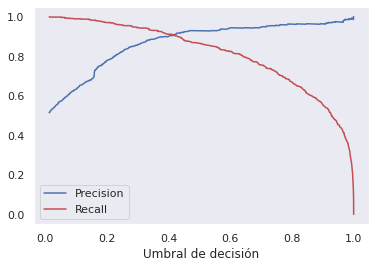

In [47]:
plt.plot(thresholds, precision[:-1],'b',label='Precision')
plt.plot(thresholds, recall[:-1],'r',label='Recall')
plt.xlabel('Umbral de decisión')
plt.grid()
plt.legend()

#### Matriz de confusión

Otra de las formas de evaluar un modelo de clasificación es a través de la matriz de confusión. Esta nos permite ver la cantidad de muestras clasificadas bien y mal de cada clase, o incluso, en un problema multi-clase ver si hay dos clases que se estén confundiendo.

In [48]:
cnf_matrix = metrics.confusion_matrix(Y_spam_test,RL_spam_L2.predict(X_spam_test))

Text(0.5, 257.44, 'Etiqueta pronosticada')

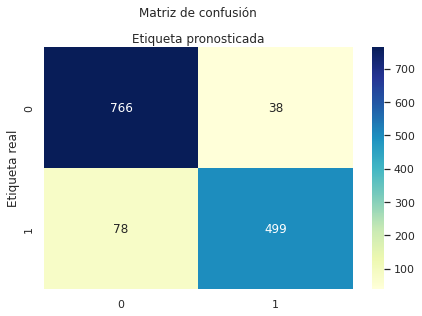

In [49]:
class_names=[0, 1] # nombre de las clases
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# creamos la matriz de confusión
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz de confusión', y=1.1)
plt.ylabel('Etiqueta real')
plt.xlabel('Etiqueta pronosticada')